In [74]:
from sklearn.datasets import load_digits

digits_dataset = load_digits()

# Изучаем данные 
# Оптическое распознавание набора данных рукописных цифр

In [75]:
print(f"Ключи digits_dataset: \n{digits_dataset.keys()}")

Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [76]:
print(digits_dataset['DESCR'][:300])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Miss


In [77]:
print(f"Названия ответов: \n{digits_dataset['target_names']}")

Названия ответов: 
[0 1 2 3 4 5 6 7 8 9]


In [78]:
chunks = [digits_dataset['feature_names'][i:i + 8] for i in range(0, len(digits_dataset['feature_names']), 8)]
formatted_lines = [' '.join(map(str, chunk)) for chunk in chunks]
result = '\n'.join(formatted_lines)
print(f"Названия признаков: \n{result}")

Названия признаков: 
pixel_0_0 pixel_0_1 pixel_0_2 pixel_0_3 pixel_0_4 pixel_0_5 pixel_0_6 pixel_0_7
pixel_1_0 pixel_1_1 pixel_1_2 pixel_1_3 pixel_1_4 pixel_1_5 pixel_1_6 pixel_1_7
pixel_2_0 pixel_2_1 pixel_2_2 pixel_2_3 pixel_2_4 pixel_2_5 pixel_2_6 pixel_2_7
pixel_3_0 pixel_3_1 pixel_3_2 pixel_3_3 pixel_3_4 pixel_3_5 pixel_3_6 pixel_3_7
pixel_4_0 pixel_4_1 pixel_4_2 pixel_4_3 pixel_4_4 pixel_4_5 pixel_4_6 pixel_4_7
pixel_5_0 pixel_5_1 pixel_5_2 pixel_5_3 pixel_5_4 pixel_5_5 pixel_5_6 pixel_5_7
pixel_6_0 pixel_6_1 pixel_6_2 pixel_6_3 pixel_6_4 pixel_6_5 pixel_6_6 pixel_6_7
pixel_7_0 pixel_7_1 pixel_7_2 pixel_7_3 pixel_7_4 pixel_7_5 pixel_7_6 pixel_7_7


In [79]:
print(f"Строки из массива data: \n{digits_dataset['data']}")

Строки из массива data: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [80]:
print(f"Форма миссива data: \n{digits_dataset['data'].shape}")

Форма миссива data: 
(1797, 64)


In [81]:
print(f"Форма массива target: \n{digits_dataset['target'].shape}")

Форма массива target: 
(1797,)


In [82]:
print(f"Ответы: \n{digits_dataset['target']}")

Ответы: 
[0 1 2 ... 8 9 8]


# Разделим данные на обучающий и тестовые наборы

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=0)

In [84]:
print(f"Форма массива x_train: {x_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (1347, 64)
Форма массива y_train: (1347,)


In [85]:
print(f"Форма массива x_test: {x_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (450, 64)
Форма массива y_test: (450,)


# Иследуем данные с помощью визуализации

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

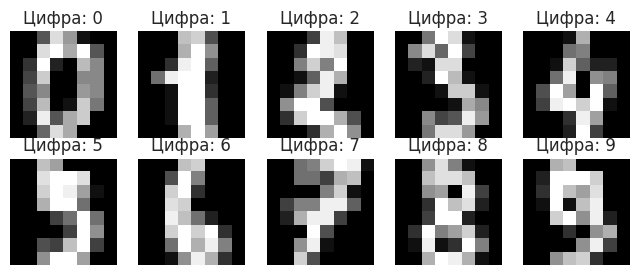

In [87]:
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(digits_dataset.data[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.title(f"Цифра: {digits_dataset.target[i]}")
    plt.axis('off')
plt.show()

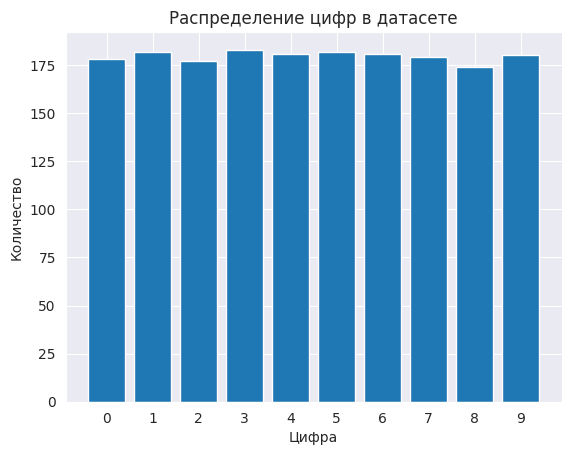

In [88]:
unique, counts = np.unique(digits_dataset.target, return_counts=True)

plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel('Цифра')
plt.ylabel('Количество')
plt.title('Распределение цифр в датасете')
plt.show()

# Постройте модель по методу k-ближайших средних

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

print(f"Лучшее значение k-ближайших средних: {best_k}")

Лучшее значение k-ближайших средних: 3


In [91]:
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

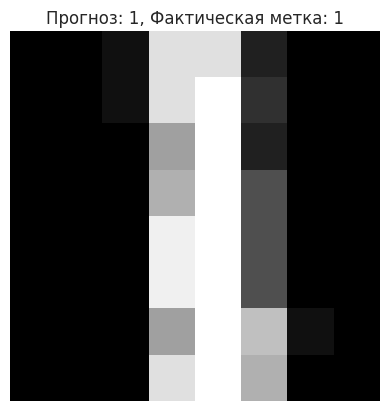

In [92]:
import random

random_index = random.randint(0, len(x_test) - 1)
sample = x_test[random_index].reshape(1, -1)
true_label = y_test[random_index]

predicted_label = knn.predict(sample)

plt.imshow(sample.reshape(8, 8), cmap='gray')
plt.title(f"Прогноз: {predicted_label[0]}, Фактическая метка: {true_label}")
plt.axis('off')
plt.show()

In [93]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")


Точность: 0.99


In [94]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:')
print(confusion)

# Отчет о классификации
class_report = classification_report(y_test, y_pred)
print('Отчет о классификации:')
print(class_report)

Матрица ошибок:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  2  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0 47]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.98      0.99        43
           2       0.98      1.00      0.99        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        48
           8       1.00      0.96      0.98        48
           9       0.98      1.00      0.99        47

    accuracy                      

<h3> Модель хорошо справилась с классификацией большинства цифр, так как на главной диагонали у матрицы ошибок значения довольно высоки.

<h3> Есть некоторые случаи ошибок, например, в ячейке (3, 2) можно видеть, что модель ошиблась в предсказании цифры 2 как цифры 3 (1 случай).